# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [3]:
df = pd.read_csv('data/advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

# 1. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

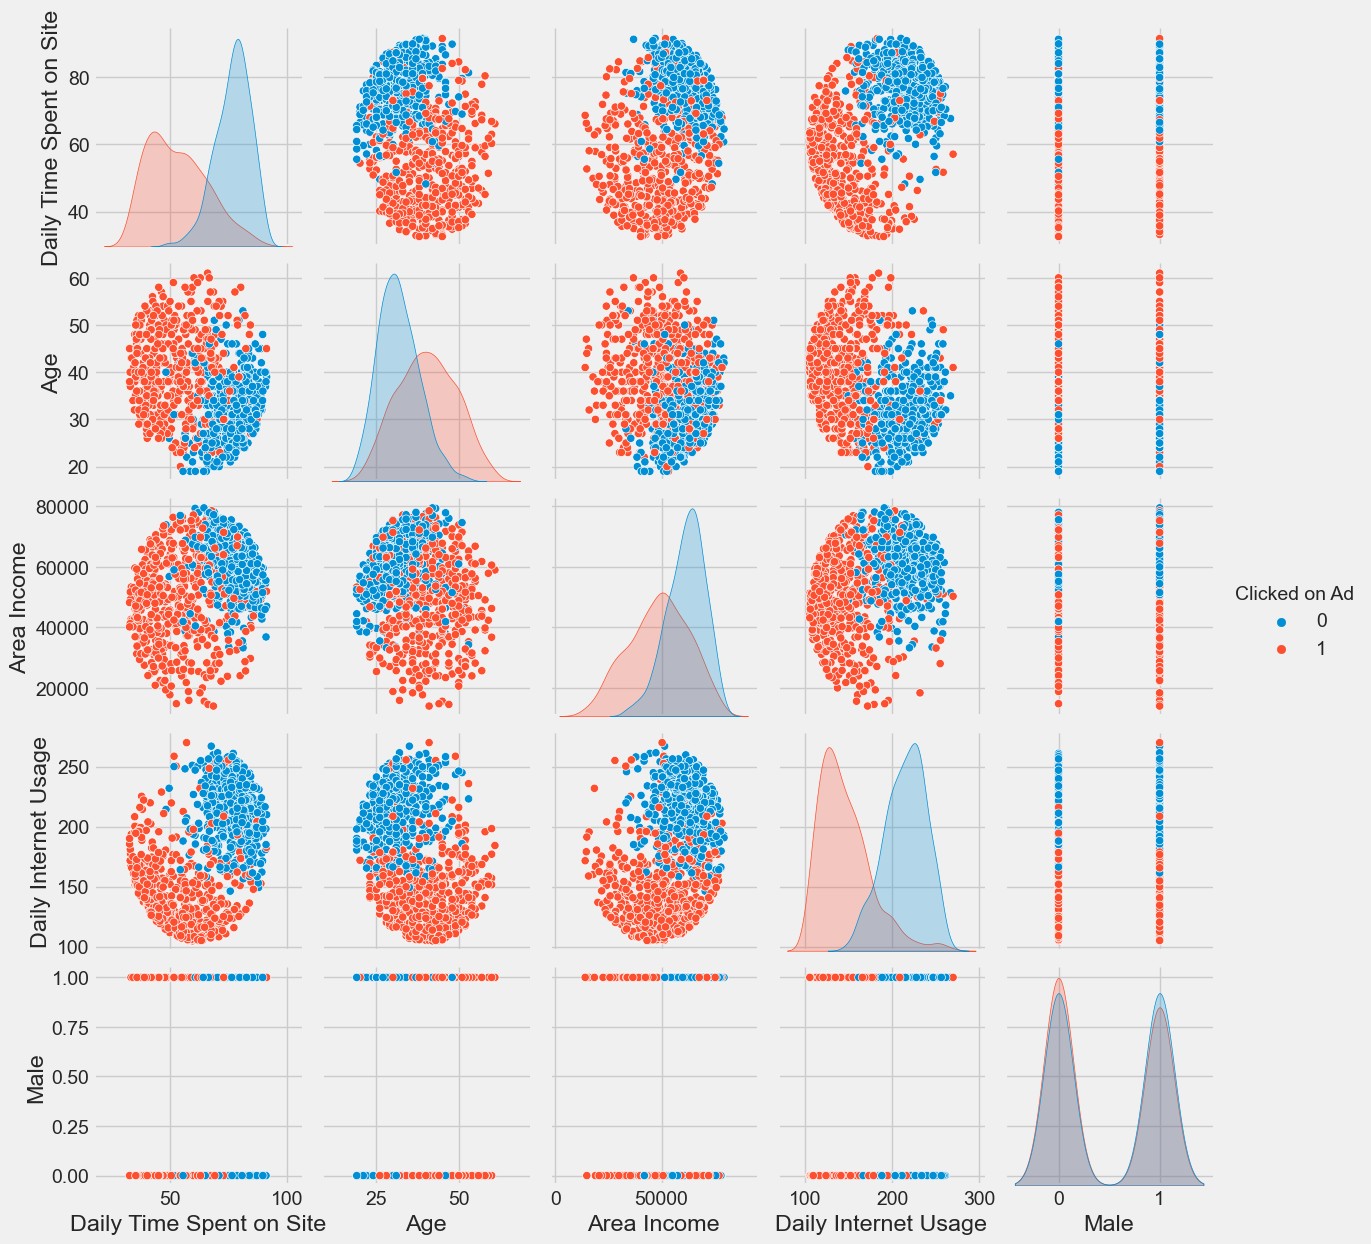

In [7]:
sns.pairplot(df, hue= 'Clicked on Ad');

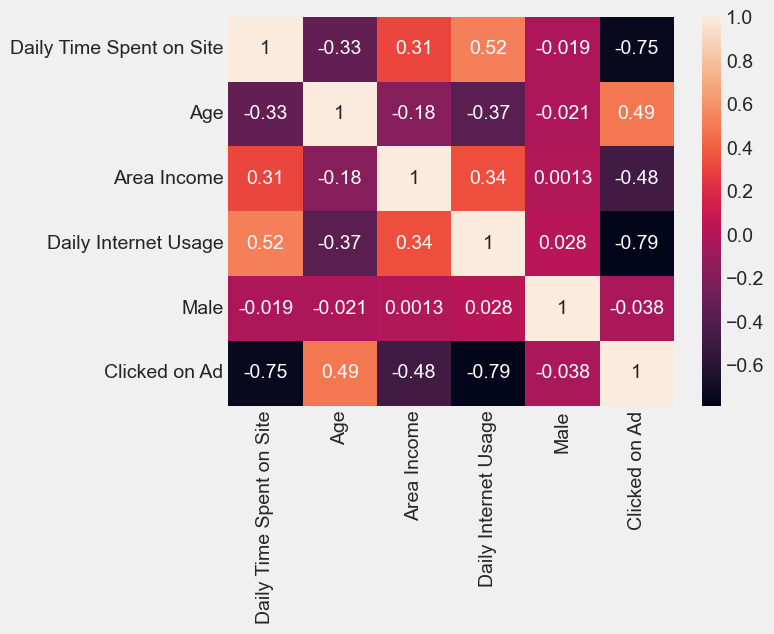

In [9]:
sns.heatmap(df.corr(), annot= True);

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB



#### 2. Train test split


In [11]:
#Convertir a datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
#Obtenemos la hora
df['Hour'] = df['Timestamp'].dt.hour

In [16]:
#Obtenemos el dia
df['weekday'] = df['Timestamp'].dt.weekday

In [17]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country           Timestamp  Clicked on Ad  Hour  weekday  
0                   Tunisia 2016-03-27 00:53:11              0     0        6  
1                     Nauru 2016-04-04 01:39:02              0     1        0  
2                San Marino 2016-03-13 20:35:42              0    20        6  
3                     Italy 2016-01-10 02:31:19              0     2        6  
4                   Iceland 2016-06-03 03:36:18              0     3        4  
..                      ...                 ...            ...   ...      ...  
995                 Lebanon 2016-02-11 21:49:00              1    21        3  
996  Bosnia and Herzegovina 2016-04-22 02:07:01              1     2        4  
997                Mongolia 2016-02-01 17:24:57              1    17        0  
998               Guatemala 2016-03-24 02:35:54              0     2        3  
999                  Brazil 2016-06-03 21:43:21              1    21        4  

[1000 rows x 12 columns]

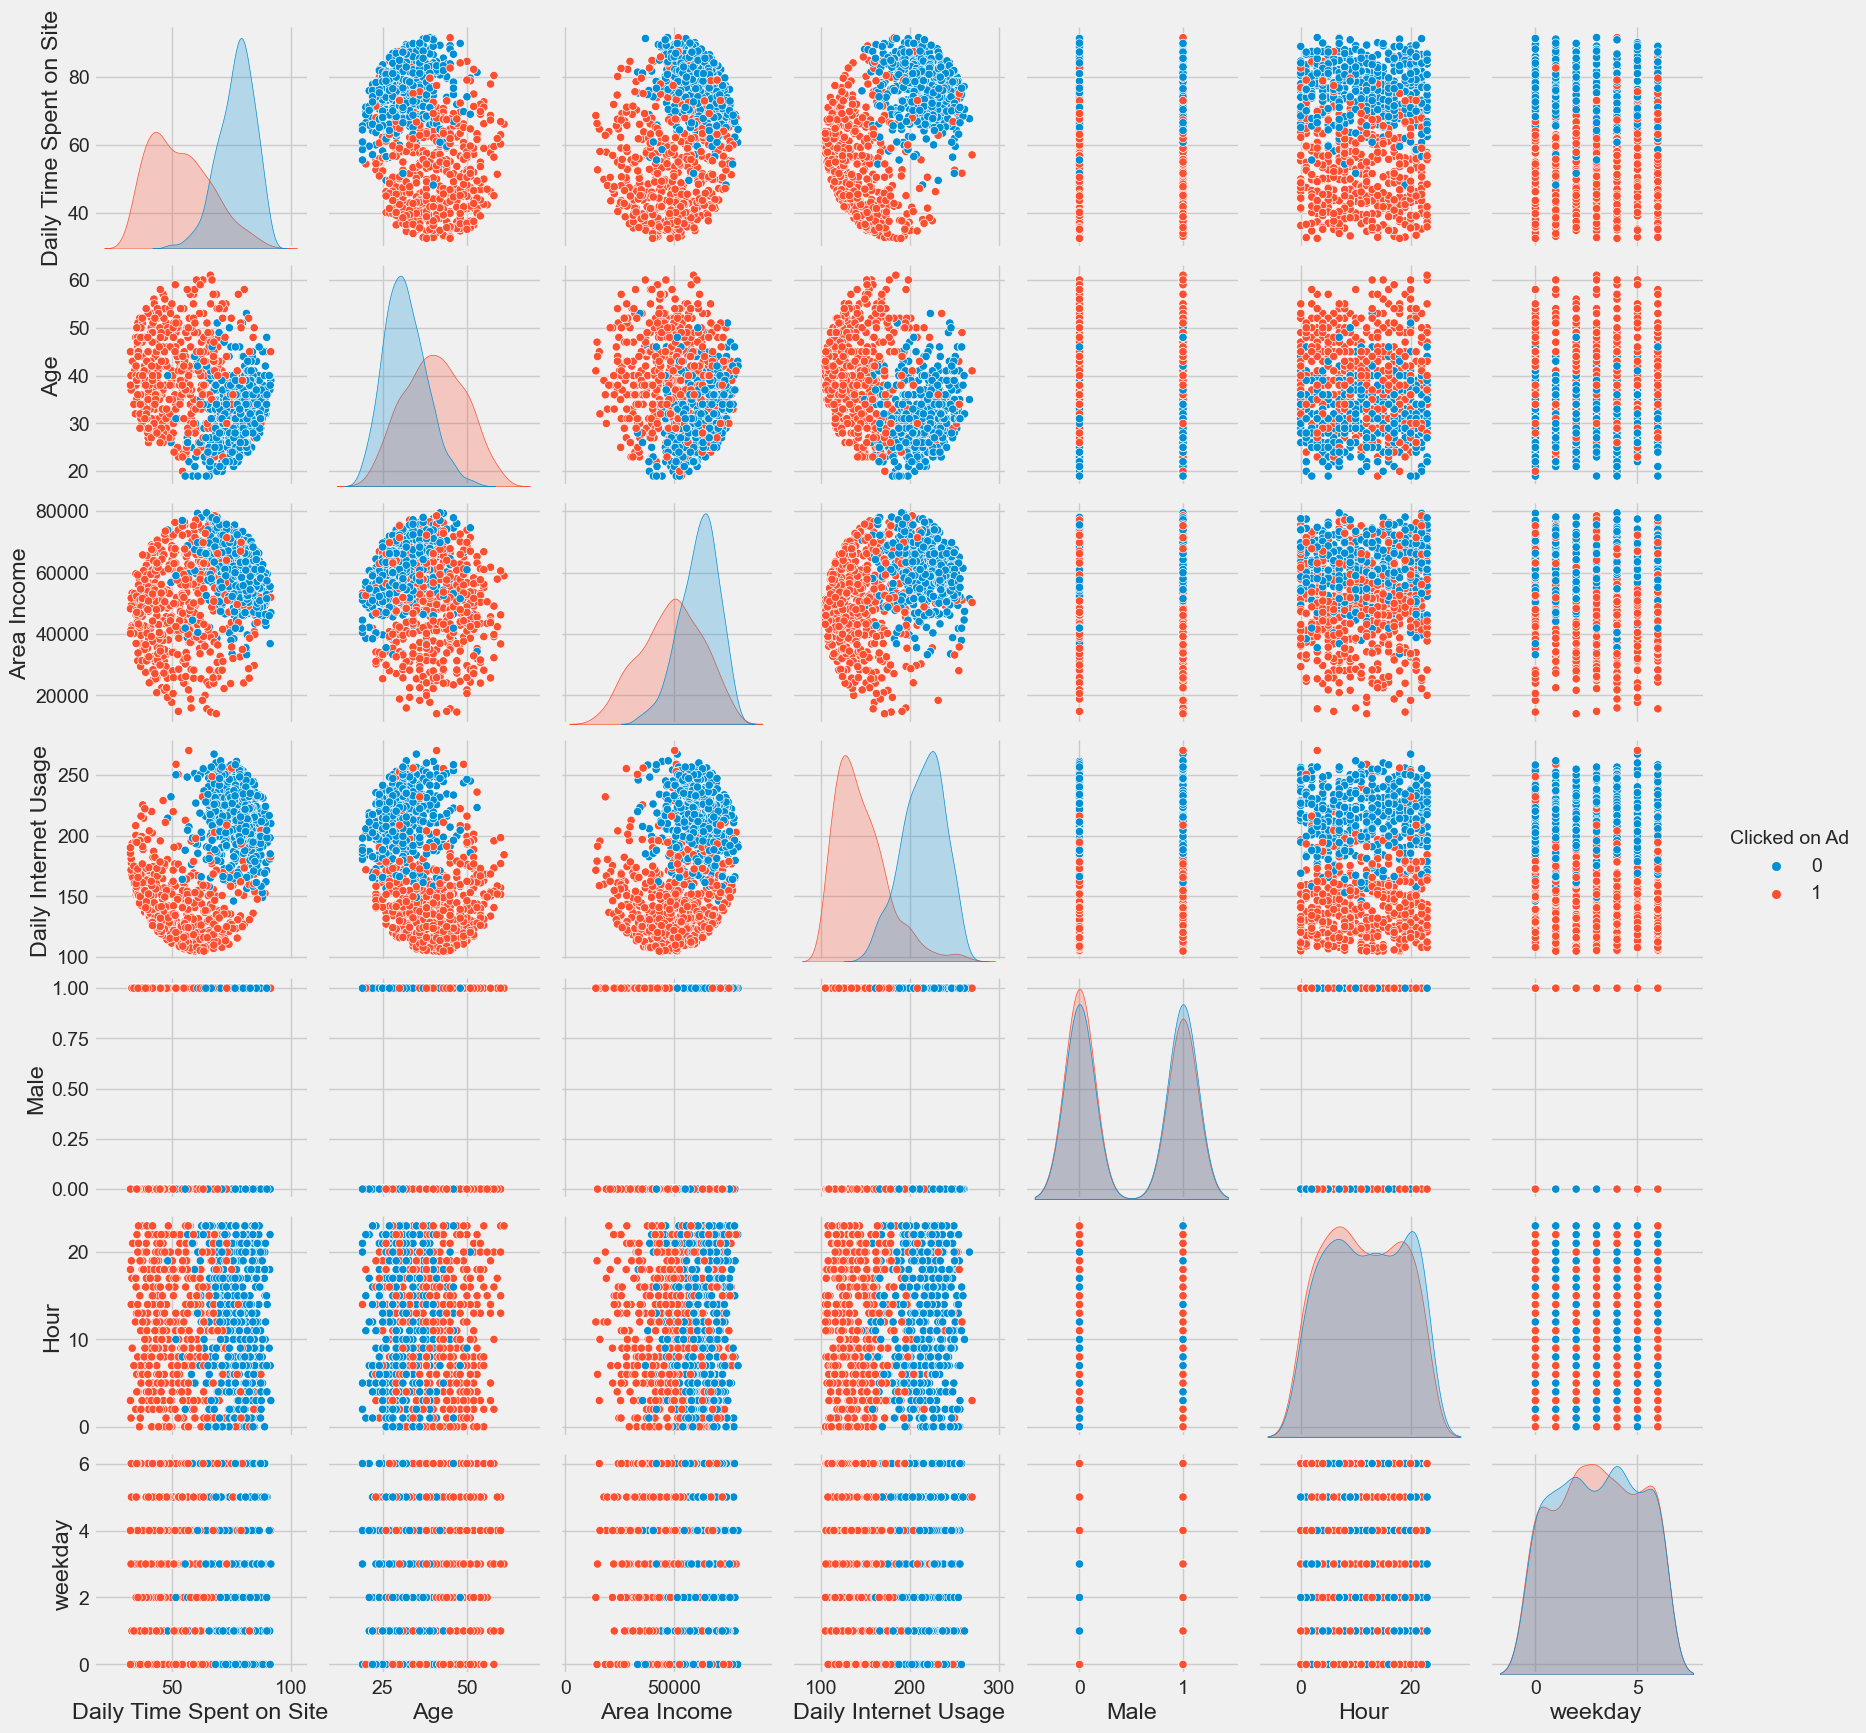

In [18]:
sns.pairplot(df, hue= 'Clicked on Ad');

In [19]:
#Obtenemos booleano de si es weekend o no
df['weekend_bool'] = np.where((df['weekday'] == 5) | (df['weekday'] == 4) | (df['weekday'] == 6), 1, 0)

In [20]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country           Timestamp  Clicked on Ad  Hour  weekday  \
0                   Tunisia 2016-03-27 00:53:11              0     0        6   
1                     Nauru 2016-04-04 01:39:02              0     1        0   
2                San Marino 2016-03-13 20:35:42              0    20        6   
3                     Italy 2016-01-10 02:31:19              0     2        6   
4                   Iceland 2016-06-03 03:36:18              0     3        4   
..                      ...                 ...            ...   ...      ...   
995                 Lebanon 2016-02-11 21:49:00              1    21        3   
996  Bosnia and Herzegovina 2016-04-22 02:07:01              1     2        4   
997                Mongolia 2016-02-01 17:24:57              1    17        0   
998               Guatemala 2016-03-24 02:35:54              0     2        3   
999                  Brazil 2016-06-03 21:43:21              1    21        4   

     weekend_bool  
0               1  
1               0  
2               1  
3               1  
4               1  
..            ...  
995             0  
996             1  
997             0  
998             0  
999             1  

[1000 rows x 13 columns]

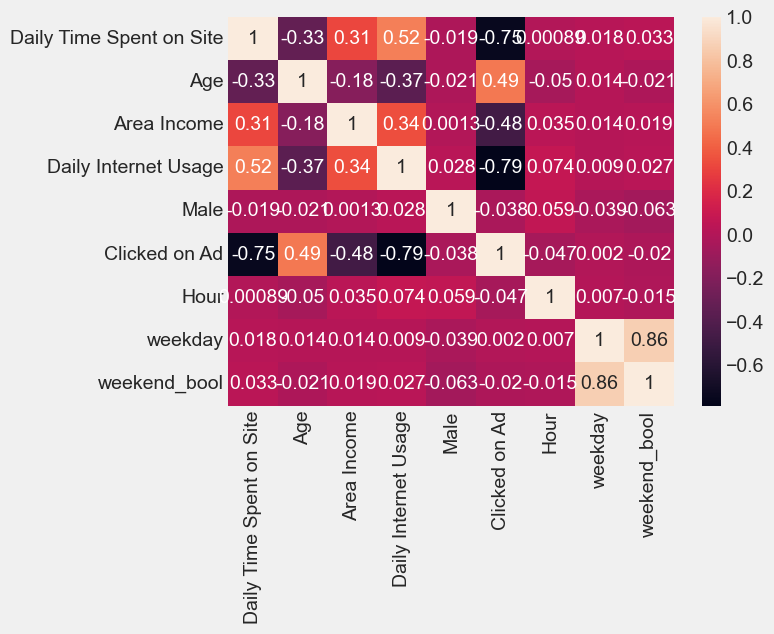

In [21]:
sns.heatmap(df.corr(), annot= True);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
 11  weekday                   1000 non-null   int64         
 12  weekend_bool         

In [25]:
#Tenemos muchas ciudades, no conviene utilizarlo como numérica para predecir
df['City'].nunique()

969

In [27]:
#Probando convertir a booleano
pd.get_dummies(df['City'])

Adamsbury  Adamside  Adamsstad  Alanview  Alexanderfurt  Alexanderview  \
0            0         0          0         0              0              0   
1            0         0          0         0              0              0   
2            0         0          0         0              0              0   
3            0         0          0         0              0              0   
4            0         0          0         0              0              0   
..         ...       ...        ...       ...            ...            ...   
995          0         0          0         0              0              0   
996          0         0          0         0              0              0   
997          0         0          0         0              0              0   
998          0         0          0         0              0              0   
999          0         0          0         0              0              0   

     Alexandrafort  Alexisland  Aliciatown  Alvaradoport  ...  Wintersfort  \
0                0           0           0             0  ...            0   
1                0           0           0             0  ...            0   
2                0           0           0             0  ...            0   
3                0           0           0             0  ...            0   
4                0           0           0             0  ...            0   
..             ...         ...         ...           ...  ...          ...   
995              0           0           0             0  ...            0   
996              0           0           0             0  ...            0   
997              0           0           0             0  ...            0   
998              0           0           0             0  ...            0   
999              0           0           0             0  ...            0   

     Wongland  Wrightburgh  Wrightview  Yangside  Youngburgh  Youngfort  \
0           0            1           0         0           0          0   
1           0            0           0         0           0          0   
2           0            0           0         0           0          0   
3           0            0           0         0           0          0   
4           0            0           0         0           0          0   
..        ...          ...         ...       ...         ...        ...   
995         0            0           0         0           0          0   
996         0            0           0         0           0          0   
997         0            0           0         0           0          0   
998         0            0           0         0           0          0   
999         0            0           0         0           0          0   

     Yuton  Zacharystad  Zacharyton  
0        0            0           0  
1        0            0           0  
2        0            0           0  
3        0            0           0  
4        0            0           0  
..     ...          ...         ...  
995      0            0           0  
996      0            0           0  
997      0            0           0  
998      0            0           0  
999      0            0           0  

[1000 rows x 969 columns]

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#Probando a convertir a numeros aleatorios con LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['Country'])

LabelEncoder()

In [30]:
df['Country_encoded'] = label_encoder.transform(df['Country'])

In [31]:
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [32]:
df['Country_encoded'].value_counts()

70     9
54     9
165    8
216    8
80     8
      ..
173    1
29     1
77     1
11     1
117    1
Name: Country_encoded, Length: 237, dtype: int64

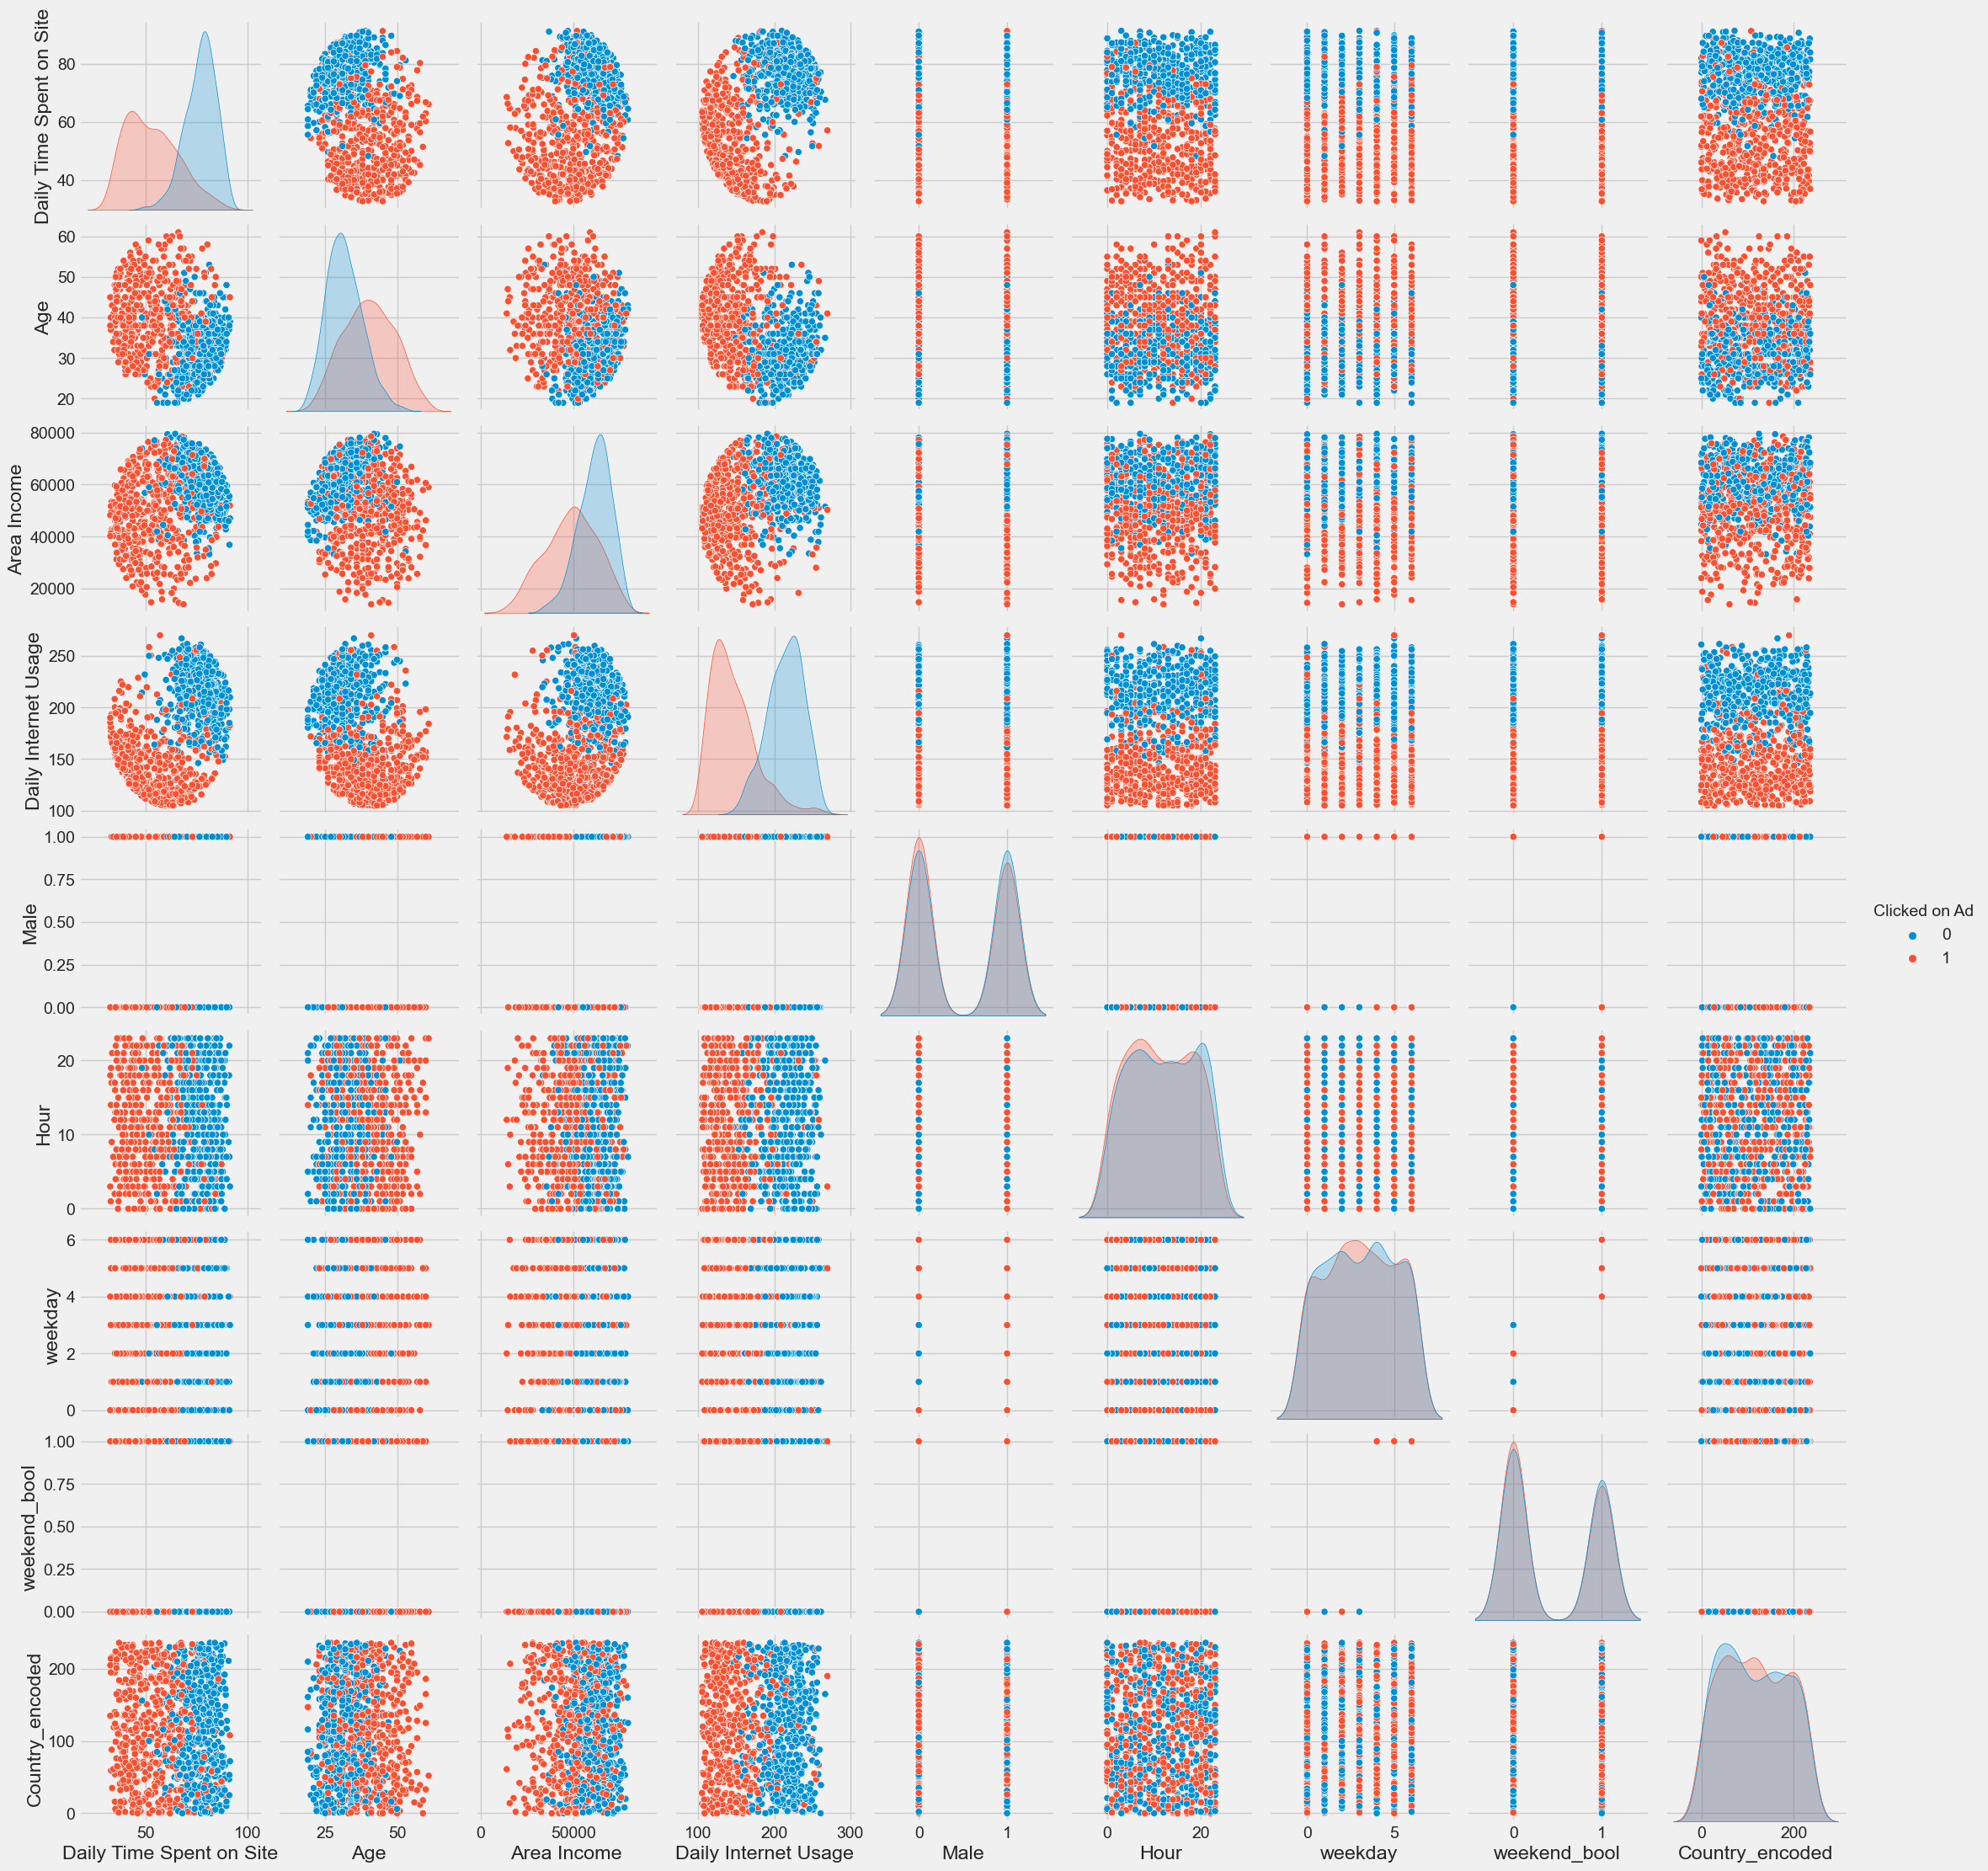

In [33]:
sns.pairplot(df, hue= 'Clicked on Ad')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
 11  weekday                   1000 non-null   int64         
 12  weekend_bool         


#### 3. StandardScaler()


In [37]:
len(df['Ad Topic Line'].unique())

1000

In [ ]:
#No lo tiramos pa' adelante
#df['Ad Topic Line'].str.get_dummies(" ")[df['Ad Topic Line'].str.get_dummies(" ").sum() > df['Ad Topic Line'].str.get_dummies(" ").sum().mean()]

In [61]:
#Obtenemos palabras unicas de topicos de ads
unique_words = []

for i in df['Ad Topic Line'].str.split():
    for j in i:
        if j not in unique_words:
            unique_words.append(j)

In [63]:
len(unique_words)

319

In [65]:
unique_words

['Cloned',
 '5thgeneration',
 'orchestration',
 'Monitored',
 'national',
 'standardization',
 'Organic',
 'bottom-line',
 'service-desk',
 'Triple-buffered',
 'reciprocal',
 'time-frame',
 'Robust',
 'logistical',
 'utilization',
 'Sharable',
 'client-driven',
 'software',
 'Enhanced',
 'dedicated',
 'support',
 'Reactive',
 'local',
 'challenge',
 'Configurable',
 'coherent',
 'function',
 'Mandatory',
 'homogeneous',
 'architecture',
 'Centralized',
 'neutral',
 'neural-net',
 'Team-oriented',
 'grid-enabled',
 'Local',
 'Area',
 'Network',
 'content-based',
 'focus',
 'group',
 'Synergistic',
 'fresh-thinking',
 'array',
 'Grass-roots',
 'extranet',
 'Persistent',
 'demand-driven',
 'interface',
 'Customizable',
 'multi-tasking',
 'website',
 'Intuitive',
 'dynamic',
 'attitude',
 'solution-oriented',
 'conglomeration',
 'Advanced',
 '24/7',
 'productivity',
 'Object-based',
 'knowledgebase',
 'Streamlined',
 'non-volatile',
 'analyzer',
 'disintermediate',
 'Future-proofed',
 'met

In [78]:
#Probando el filtro para obtener palabras 'key'. Filtro 1, que aparezca la palabra mas de 12 veces
df['Clicked on Ad'][df['Ad Topic Line'].str.contains('5thgeneration')].value_counts().sum() > 12

16

In [ ]:
#Filtro 2 que cuando aparezca la palabra se relacione con clicks, en porcentaje (Que tenga mas de 70% de clicks al aparecer)
df['Clicked on Ad'][df['Ad Topic Line'].str.contains(i)].value_counts(normalize= True)[1] > 0.70

In [81]:
#Obtenemos los keywords
keyword = []


#Probabamos los filtros con cada una de las palabras en 'unique_words'
for i in unique_words:
    #Tres condiciones, mas de 70% de clicks o menos de 30% y sumatoria mayor a 12
    if ((df['Clicked on Ad'][df['Ad Topic Line'].str.contains(i)].value_counts(normalize= True)[1] > 0.70) | \
    (df['Clicked on Ad'][df['Ad Topic Line'].str.contains(i)].value_counts(normalize= True)[1] < 0.30)) & \
        (df['Clicked on Ad'][df['Ad Topic Line'].str.contains(i)].value_counts().sum() >= 12):

            print('Palabra: ', i)
            print('Values: ', df['Clicked on Ad'][df['Ad Topic Line'].str.contains(i)].value_counts(normalize= True))
            keyword.append(i)

    

Palabra:  local
Values:  0    0.714286
1    0.285714
Name: Clicked on Ad, dtype: float64
Palabra:  website
Values:  1    0.714286
0    0.285714
Name: Clicked on Ad, dtype: float64
Palabra:  disintermediate
Values:  1    0.833333
0    0.166667
Name: Clicked on Ad, dtype: float64
Palabra:  impactful
Values:  0    0.733333
1    0.266667
Name: Clicked on Ad, dtype: float64
Palabra:  definition
Values:  0    0.846154
1    0.153846
Name: Clicked on Ad, dtype: float64
Palabra:  capability
Values:  0    0.714286
1    0.285714
Name: Clicked on Ad, dtype: float64
Palabra:  user
Values:  1    0.722222
0    0.277778
Name: Clicked on Ad, dtype: float64
Palabra:  Pre-emptive
Values:  0    0.8
1    0.2
Name: Clicked on Ad, dtype: float64
Palabra:  model
Values:  0    0.75
1    0.25
Name: Clicked on Ad, dtype: float64
Palabra:  set
Values:  0    0.705882
1    0.294118
Name: Clicked on Ad, dtype: float64
Palabra:  multi-state
Values:  0    0.733333
1    0.266667
Name: Clicked on Ad, dtype: float64
Pala

In [82]:
keyword

['local',
 'website',
 'disintermediate',
 'impactful',
 'definition',
 'capability',
 'user',
 'Pre-emptive',
 'model',
 'set',
 'multi-state',
 'emulation',
 'modular',
 'Versatile',
 'directional',
 'moratorium',
 'success']

In [83]:
#Se hace join para colocarlo dentro de str.contains
'|'.join(keyword)

'local|website|disintermediate|impactful|definition|capability|user|Pre-emptive|model|set|multi-state|emulation|modular|Versatile|directional|moratorium|success'

In [84]:
#Hacemos columna booleana de contener o no keywords
df['keyword'] = np.where(df['Ad Topic Line'].str.contains('|'.join(keyword)), 1, 0)

In [86]:
df['keyword'].value_counts()

0    764
1    236
Name: keyword, dtype: int64

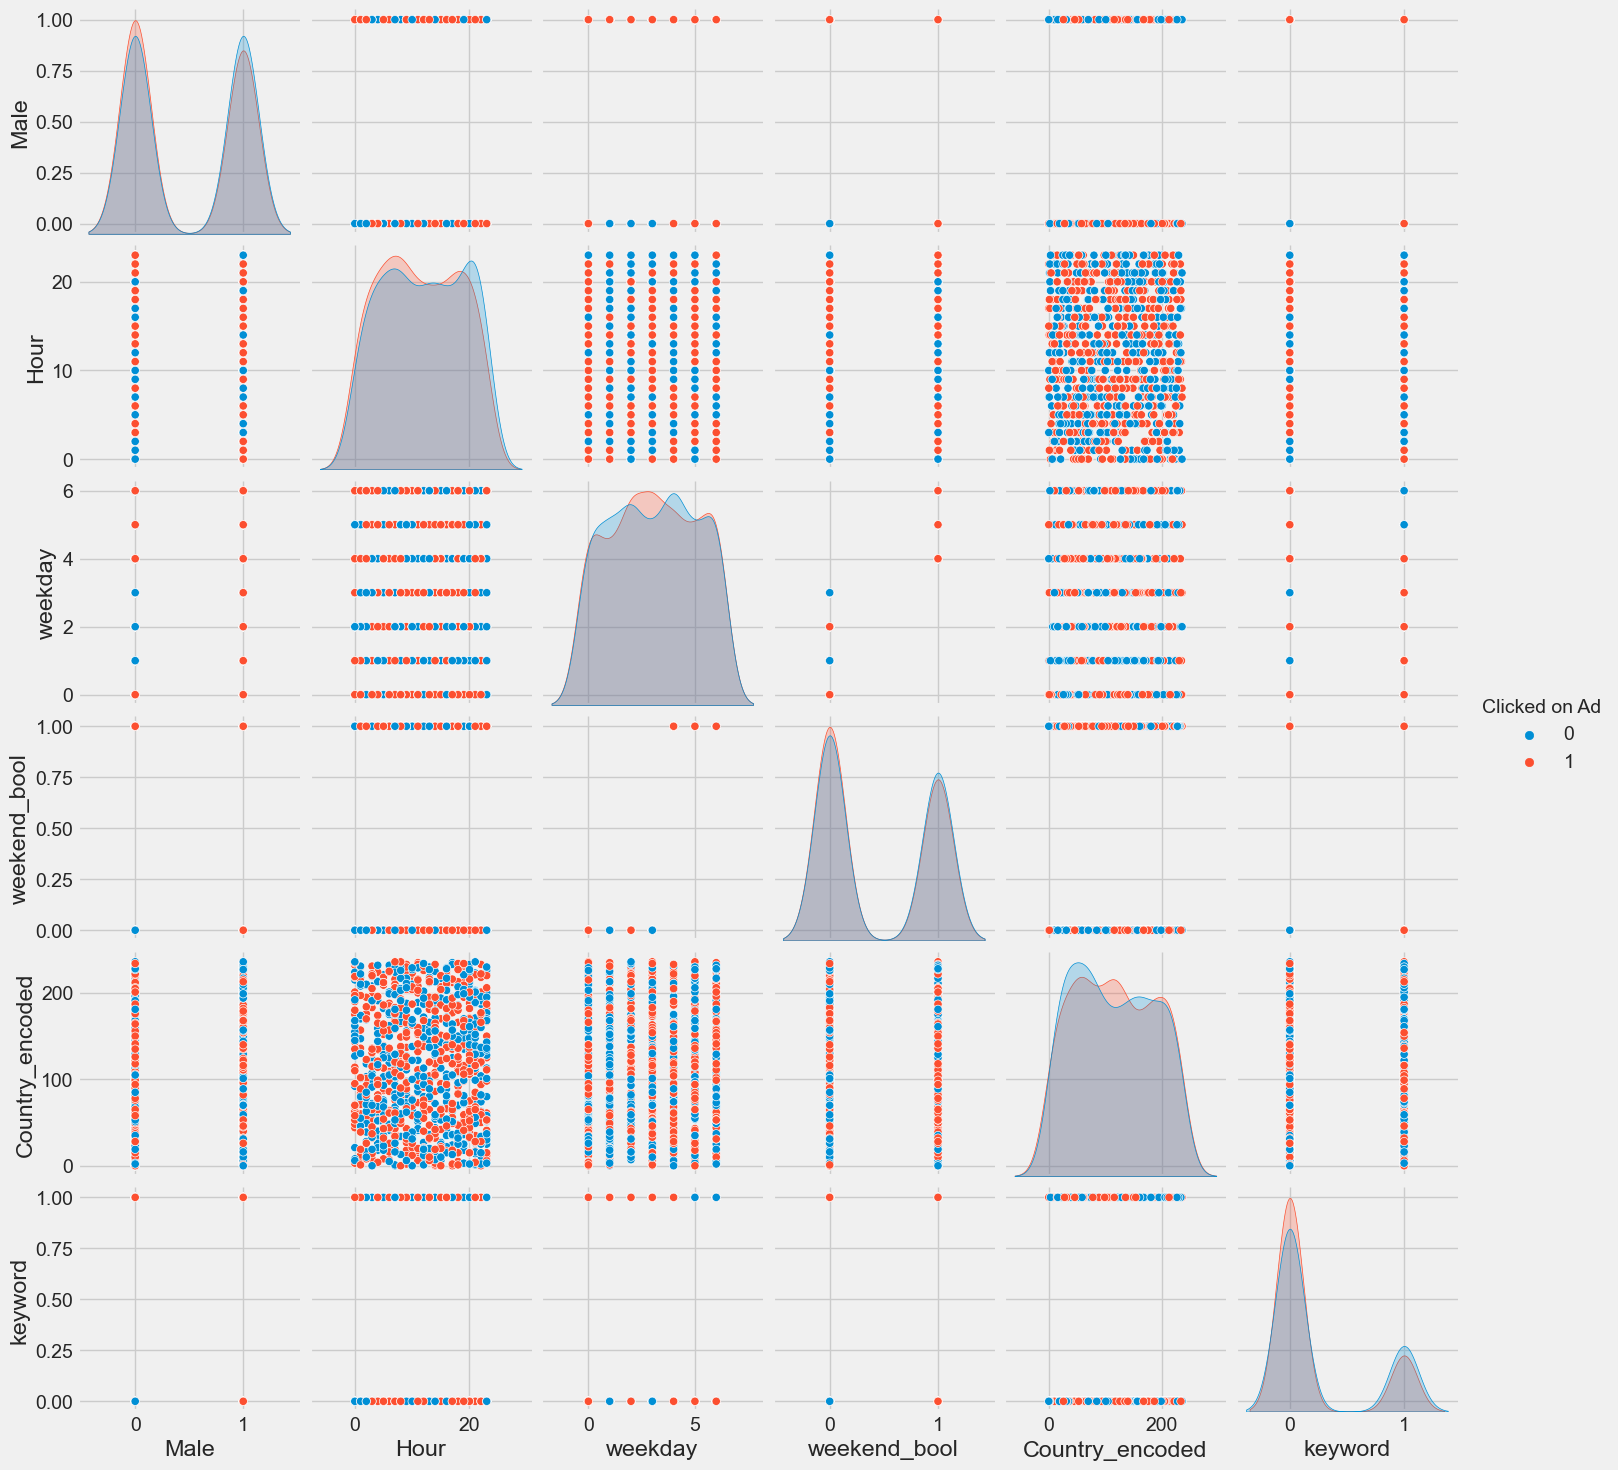

In [87]:
sns.pairplot(df.iloc[:, 5::], hue= 'Clicked on Ad')

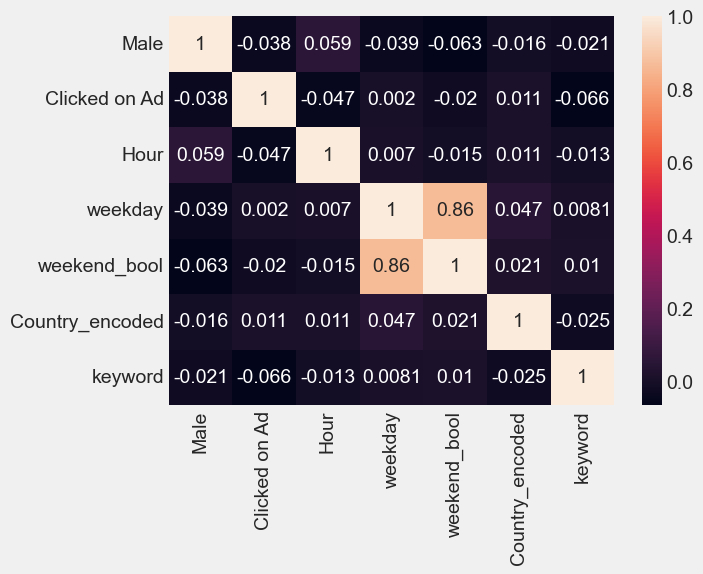

In [90]:
#No mejoró la correlacion
sns.heatmap((df.iloc[:, 5::]).corr(), annot= True);

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
 11  weekday                   1000 non-null   int64         
 12  weekend_bool         

In [100]:
X = df.iloc[:, :4]
Y = df['Clicked on Ad']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [103]:
print('X Train shape: ',X_train.shape)
print('X Test shape: ',X_test.shape)
print('Y Train shape: ',Y_train.shape)
print('Y test shape: ',Y_test.shape)

X Train shape:  (800, 4)
X Test shape:  (200, 4)
Y Train shape:  (800,)
Y test shape:  (200,)


In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression

In [109]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scal, Y_train)

LogisticRegression()

# 4. Evaluation


In [110]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [111]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve


#### 1. Confusion Matrix


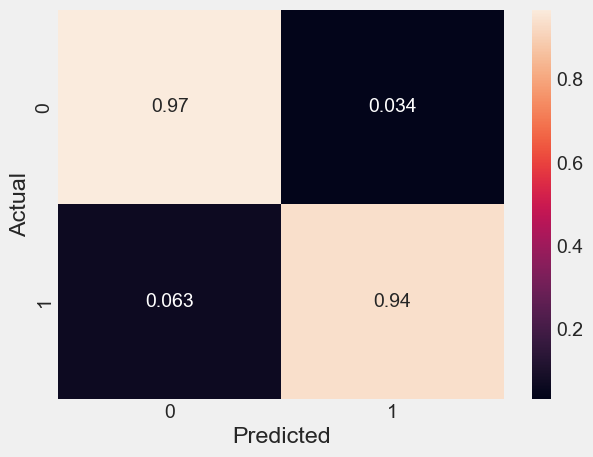

In [117]:
sns.heatmap(confusion_matrix(Y_test, logistic_reg.predict(X_test_scal), normalize= 'true'), annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual');


#### 2. Precision


TP/(TP+FP)

In [119]:
precision_score(Y_test, logistic_reg.predict(X_test_scal))

0.9719626168224299



#### 3. Recall


TP/(TP+FN)

In [121]:
recall_score(Y_test, logistic_reg.predict(X_test_scal))

0.9369369369369369



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [122]:
f1_score(Y_test, logistic_reg.predict(X_test_scal))

0.9541284403669725

In [135]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(Y_test, logistic_reg.predict(X_test_scal)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        89
           1       0.97      0.94      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200





#### 5. ROC curve

In [126]:
logistic_reg.predict_proba(X_test_scal)[:, 1]

array([0.98833121, 0.99963025, 0.99914922, 0.99515132, 0.00842319,
       0.40596946, 0.02900217, 0.9998407 , 0.01314573, 0.99993923,
       0.00661748, 0.9992326 , 0.99991975, 0.00954372, 0.99964742,
       0.99996029, 0.99998974, 0.99704468, 0.03079672, 0.99987411,
       0.00653336, 0.98636169, 0.99997624, 0.15998662, 0.00605424,
       0.99998634, 0.03732577, 0.00473124, 0.99990794, 0.99890308,
       0.10640896, 0.57292438, 0.01207587, 0.97757948, 0.99993845,
       0.01731963, 0.00904979, 0.70958049, 0.99956986, 0.99998011,
       0.01455442, 0.99995106, 0.49958004, 0.99996518, 0.01575896,
       0.0954925 , 0.98455576, 0.99998256, 0.19094335, 0.99980231,
       0.99998127, 0.02778573, 0.9983761 , 0.02732459, 0.00904399,
       0.01638689, 0.01085469, 0.99997816, 0.01344974, 0.9997708 ,
       0.00527967, 0.9981546 , 0.01886061, 0.99996811, 0.99733436,
       0.99952397, 0.99998318, 0.01609543, 0.99639274, 0.99981232,
       0.99815466, 0.99606132, 0.82565387, 0.03638522, 0.89513

In [127]:
fpr, tpr, thresholds = roc_curve(Y_test, logistic_reg.predict_proba(X_test_scal)[:, 1])

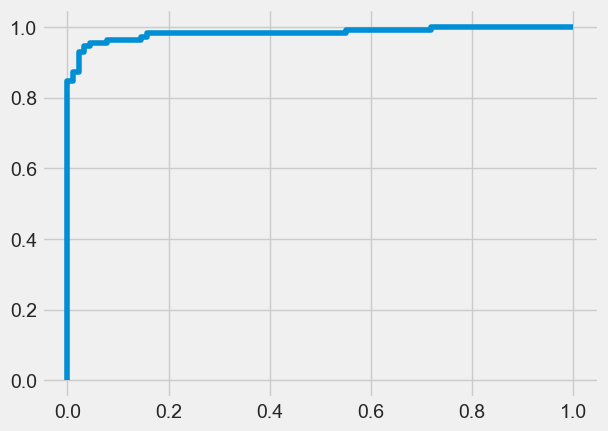

In [128]:
plt.plot(fpr, tpr)

In [129]:
roc_auc_score(Y_test, logistic_reg.predict_proba(X_test_scal)[:, 1])

0.9825893309039376



#### 6. P-R curve

In [131]:
precision, recall, thresholds = precision_recall_curve(Y_test, logistic_reg.predict_proba(X_test_scal)[:, 1])

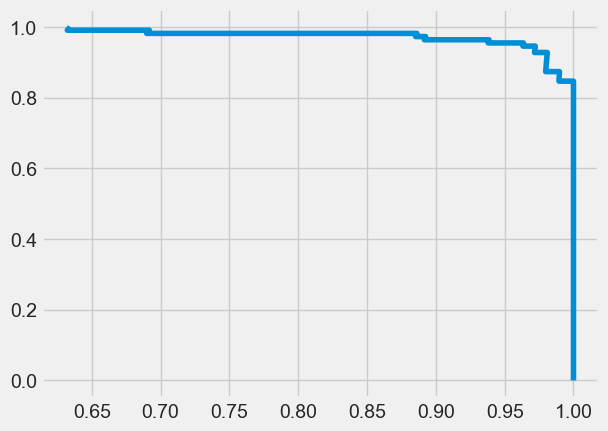

In [132]:
plt.plot(precision, recall)

In [133]:
thresholds

array([0.00870294, 0.00876802, 0.00904399, 0.00904979, 0.00929959,
       0.00954372, 0.01014064, 0.01042277, 0.01059516, 0.01079262,
       0.01085469, 0.01091267, 0.01109944, 0.01179682, 0.01207587,
       0.01218346, 0.01249573, 0.01295922, 0.01314573, 0.01344974,
       0.01455442, 0.01528742, 0.01575896, 0.01609543, 0.01638689,
       0.01731963, 0.01816223, 0.01886061, 0.0195472 , 0.02197862,
       0.02319917, 0.02732459, 0.02737555, 0.02778573, 0.02900217,
       0.03079672, 0.03130527, 0.03409726, 0.0354099 , 0.03638522,
       0.03732577, 0.0381712 , 0.04121533, 0.04564649, 0.0732882 ,
       0.07335892, 0.07697341, 0.08087528, 0.09470407, 0.0954925 ,
       0.09680272, 0.10640896, 0.13021958, 0.15998662, 0.16571527,
       0.16864423, 0.17556915, 0.19094335, 0.26283104, 0.27726512,
       0.30929888, 0.31365699, 0.38272413, 0.40596946, 0.45471404,
       0.4569095 , 0.47234667, 0.49958004, 0.56194337, 0.57292438,
       0.70958049, 0.71082322, 0.72709889, 0.7466738 , 0.75476